Input layer created
Reshape layer created
Output layer created


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 16, 16, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 64, 64, 3)      │            51 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,907 (101.20 KB)

 Trainable params: 25,907 (101.20 KB)

 Non-trainable params: 0 (0.00 B)

Noise shape: (1, 100)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Generated image shape: (1, 64, 64, 3)
Time taken to generate images: 0.04377889633178711 seconds


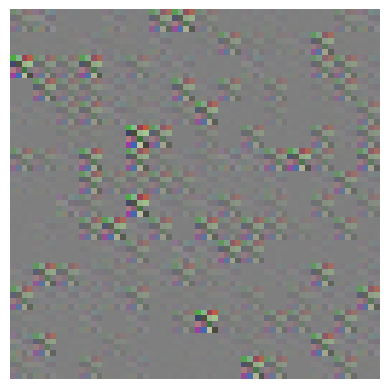

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU, Input
import time
import matplotlib.pyplot as plt

def build_very_simple_generator():
    noise_shape = (100,)
    
    input_layer = Input(shape=noise_shape)
    print("Input layer created")
    
    x = Dense(256)(input_layer)
    x = LeakyReLU(negative_slope=0.2)(x)
    x = Reshape((16, 16, 1))(x)  # Simplified reshaping for debugging
    print("Reshape layer created")
    
    output_layer = Conv2DTranspose(3, kernel_size=4, strides=4, padding='same', activation='tanh')(x)
    print("Output layer created")
    
    model = Model(input_layer, output_layer)
    return model

# Build the generator
generator = build_very_simple_generator()
generator.summary()

# Generate a batch of images
batch_size = 1
noise = np.random.normal(0, 1, (batch_size, 100))
print("Noise shape:", noise.shape)

# Measure the time taken for generating images
start_time = time.time()
gen_imgs = generator.predict(noise)
end_time = time.time()

print("Generated image shape:", gen_imgs.shape)
print("Time taken to generate images:", end_time - start_time, "seconds")

# Display the generated image using matplotlib
gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images to [0, 1]

plt.imshow(gen_imgs[0])
plt.axis('off')
plt.show()
